Process RTS sample scenarios to understand input-output relationship between RTS scenarios and Vatic outputs:
(i) total daily system costs; (ii) lost load; (iii) renewable curtailment. The aggregated solar, wind, load assets are considered below for january 20, April 02, June 30, October 17. The results for the dates are shown sequencially. We consider all load, solar and wind to be stochastic and in that case we try to understand the relationship between the scenarios and the vatic output. Here are the conclusions:
1. Load shedding is very dynamic over days. Duration of load shedding and number of scenarios having load ahedding highly varies over days. 
2. Wind has more effects on the vatic output compared to solar.
3. Generation cost and daily production GWh maintain a linear relationship in case of wind and load-wind-solar but only from the solar scenarios it is not possible to predict the scenarios having high generation cost.
4. Scenarios having rapid/abrupt jump/drop in energy are not linearly/directy connected to high Generation cost or Load shedding.

5. The scenario causing the high generation cost, for them the integration of energy generation over 24 hrs are high and above the thresold value. Thresold is considered as the daily production GWh of the mean of scenarios.

6. The scenarios that causes the highest 5% generation cost does not have any connection with the scenarios causing Load shedding or the renewable curtailment though. We consider those scenarios whose integration value is high.

In [1]:
import pandas as pd
import bz2
import dill as pickle
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import mean
import numpy as np
import math

In [2]:
def LoadShedHours(hours, LoadShed,date):
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,2,1)
    DurationLoadShed=[]
    for i in range(0,1000):
        a=LoadShed[i]
        d=np.count_nonzero(a) 
        DurationLoadShed.append(d)
    ax.set_ylabel("Frequency",fontsize=15)
    ax.set_xlabel("Duration of Load Shed",fontsize=15)
    ax.hist(DurationLoadShed, bins=10,color = "b")
    plt.show
    plt.grid()
    ax.tick_params(labelsize=15)

In [3]:
def plotScens(xTime, yScens,yFrcst,yMean, ax=None, legend=0, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
        
    ci9 = np.quantile(yScens, 0.9, axis=0)
    ci975 = np.quantile(yScens, 0.975, axis=0)
    ci995 = np.quantile(yScens, 0.995, axis=0)
    ciMax = np.max(yScens,axis=0)
    ci1 = np.quantile(yScens, 0.1, axis=0)
    ci025 = np.quantile(yScens, 0.025, axis=0)
    ci005 = np.quantile(yScens, 0.005, axis=0)
    ciMin = np.min(yScens, axis=0)
    ax.fill_between(xTime, ci005, ci995, color='gray', alpha=.15)
    ax.fill_between(xTime, ci025, ci975, color='b', alpha=.2, label=r'CI $95\%$')
    ax.fill_between(xTime, ci1, ci9, color='b', alpha=.2)
    ax.fill_between(xTime, ciMin, ciMax,color='gray',alpha=0.07)
    ax.plot(xTime,yFrcst,'-o',color='darkorange',linewidth=2,markersize=8,label='Forecast')
    ax.plot(xTime, yMean,'--b', label='Mean')
    ax.set_xlim(left=-0.25,right=23.25)
    ax.set_xticks([0,6,12,18,24])
    ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='12', horizontalalignment='right') 
    if legend > 0:
        ax.legend(fontsize=12)
    #ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)

In [4]:
from GenCostIntegrationScenario import *

def PlotingScenarios(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date):
    #, VaticOutput, LoadShedHour):
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,3,1)
    ax.set_ylabel("Wind-"+date,fontsize=15)
    ax = plotScens(time, WindScenarios,WindForecast,WindMean, ax=ax)
    plt.grid(linewidth=0.25)
    ax.tick_params(labelsize=15)
    plt.xticks([0,6,12,18,24], ('0', '6', '12', '18', '24'), fontsize='11', horizontalalignment='right')
    plt.show
    plt.grid()
    ax.tick_params(labelsize=15)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    
    ax = fig.add_subplot(1,3,2)
    ax.set_ylabel("Solar-"+date,fontsize=15)
    ax = plotScens(time, SolarScenarios,SolarForecast,SolarMean, ax=ax)
    plt.grid(linewidth=0.25)
    ax.tick_params(labelsize=15)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    
    ax = fig.add_subplot(1,3,3)
    ax.set_ylabel("Load-"+date,fontsize=15)
    ax = plotScens(time, LoadScenarios,LoadForecast,LoadMean, ax=ax)
    plt.xticks([0,6,12,18,24], ('0', '6', '12', '18', '24'), fontsize='11', horizontalalignment='right')
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    plt.show
    plt.grid()
    ax.tick_params(labelsize=15)
def PlotingVaticOutput(time, GenerationCostAll, LoadSheddingAll, RenewableCurtailmentAll, date):
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,3,1)
    ax.set_ylabel("Generation Cost-"+date,fontsize=15)
    ax.hist(GenerationCostAll, bins=20, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    ax = fig.add_subplot(1,3,2)
    ax.set_ylabel("Load Shedding-"+date,fontsize=15)
    ax.hist(LoadSheddingAll, bins=20, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    ax = fig.add_subplot(1,3,3)
    ax.set_ylabel("Renewable Curtailment-"+date,fontsize=15)
    ax.hist(RenewableCurtailmentAll, bins=20, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    
def PlotingRelationship1(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date):

    DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
    Thresold=mean(DifferenceLoadWindSolar)
    HighGenCost, IntegrationScen=GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time)
def PlotingRelationship2(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date):

    DifferenceLoadWindSolar=WindScenarios
    Thresold=mean(DifferenceLoadWindSolar)
    HighGenCost, IntegrationScen=GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time)
def PlotingRelationship3(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date):

    DifferenceLoadWindSolar=SolarScenarios
    Thresold=mean(DifferenceLoadWindSolar)
    HighGenCost, IntegrationScen=GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time)


Jan
Apr
June
Oct


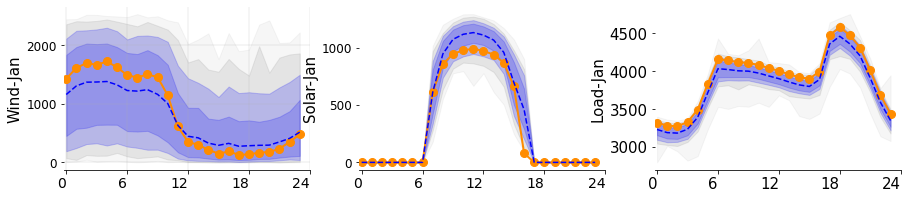

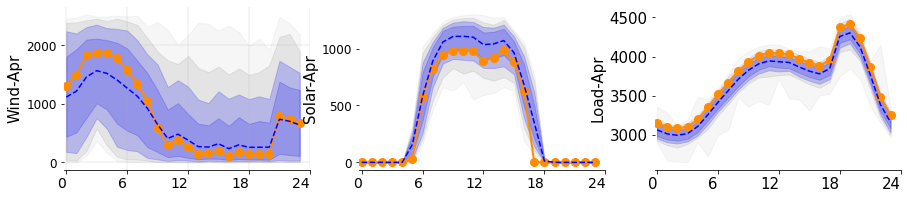

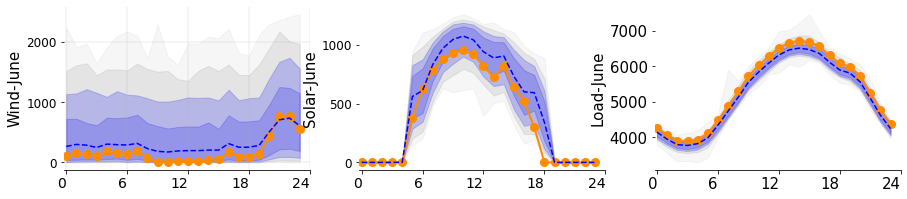

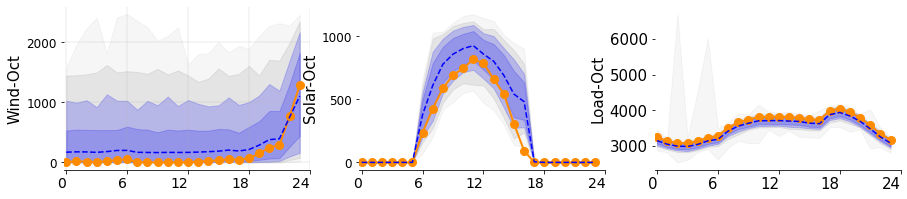

In [5]:
for i in range(0,4):
    date=input()
    Forecast = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\Forecast.csv")
    Mean = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\Mean.csv")
    WindScenarios = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\LoadScenariosAggregated.csv")
    WindMean=Mean['WindMean']
    SolarMean=Mean['SolarMean']
    LoadMean=Mean['LoadMean']
    time= Mean['time']
    WindForecast=Forecast['WindForecast']
    SolarForecast=Forecast['SolarForecast']
    LoadForecast=Forecast['LoadForecast']
    PlotingScenarios(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date)

Jan
Apr
June
Oct


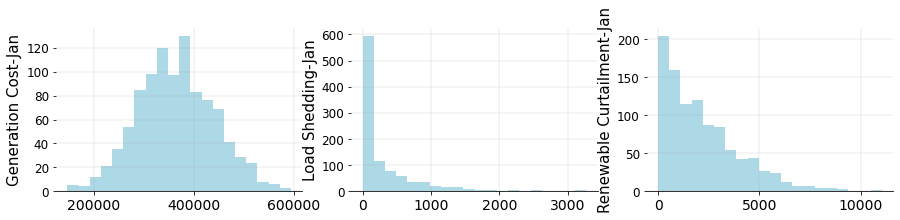

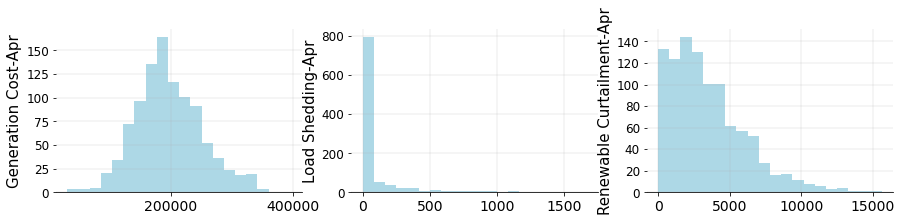

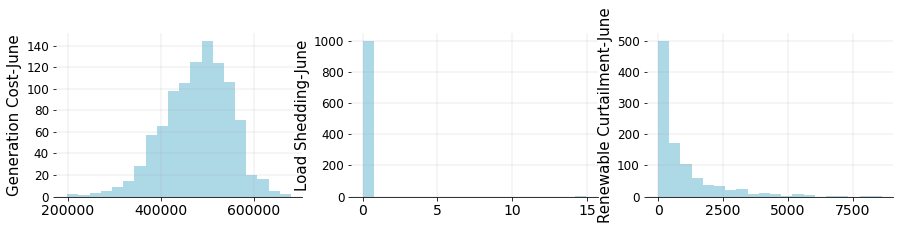

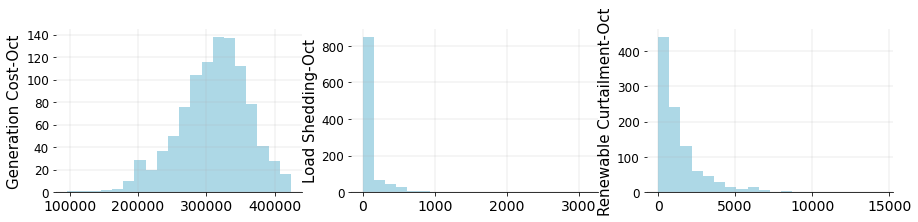

In [6]:
for i in range(0,4):
    date=input()
    VaticOutput = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\VaticOutput.csv")
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    PlotingVaticOutput(time,GenerationCostAll, LoadSheddingAll, RenewableCurtailmentAll, date)

Jan
The indices of the scenarios which are always above the mean of the scenarios [12, 230, 319, 342, 539, 587, 905]


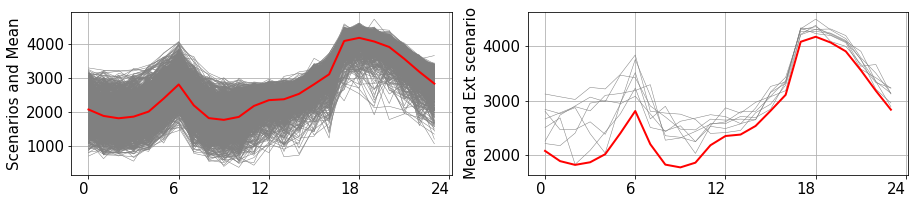

Daily production GWh for the mean, 63673.651625499995
Apr
The indices of the scenarios which are always above the mean of the scenarios [10, 99, 156, 634, 655, 700, 846, 910]


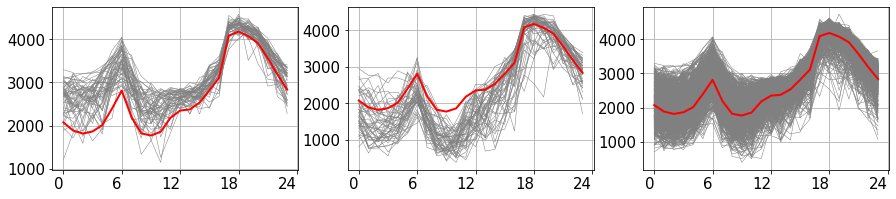

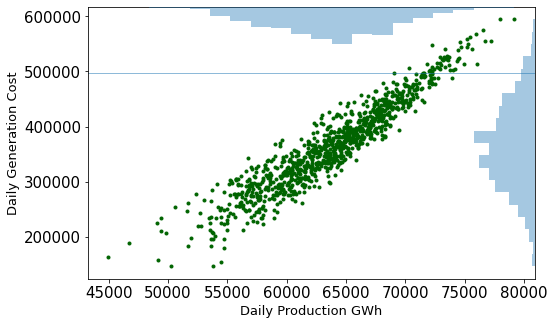

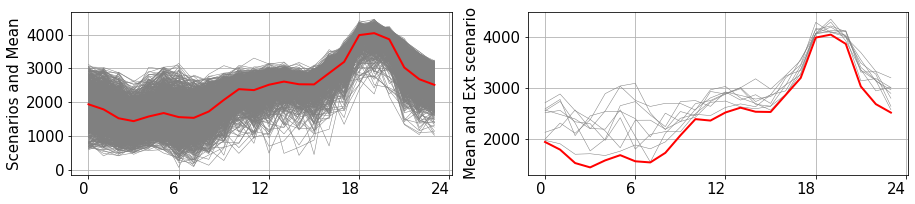

Daily production GWh for the mean, 58009.53733880001
June
The indices of the scenarios which are always above the mean of the scenarios [9, 75, 116, 175, 227, 292, 467, 510, 538, 583, 606, 629, 653, 763, 778, 904]


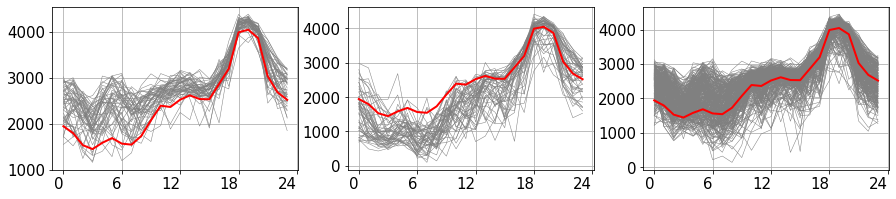

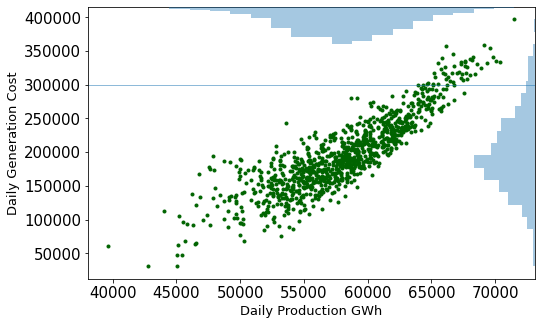

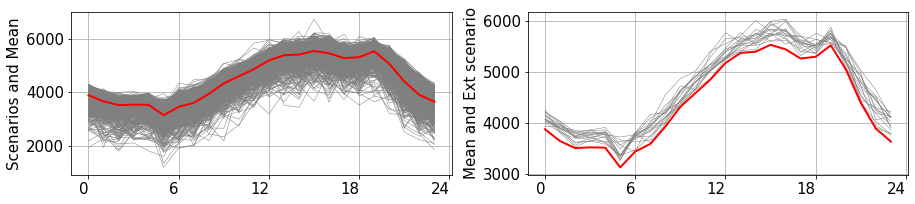

Daily production GWh for the mean, 106011.84560320002
Oct
The indices of the scenarios which are always above the mean of the scenarios [50, 65, 221, 239, 283, 381, 484, 542, 755, 761, 766, 796, 802, 905, 917]


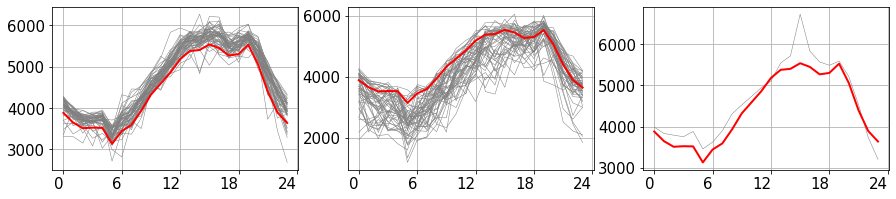

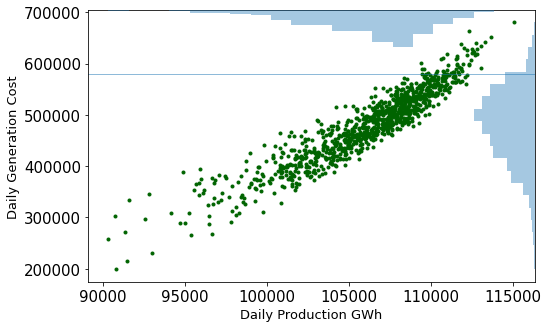

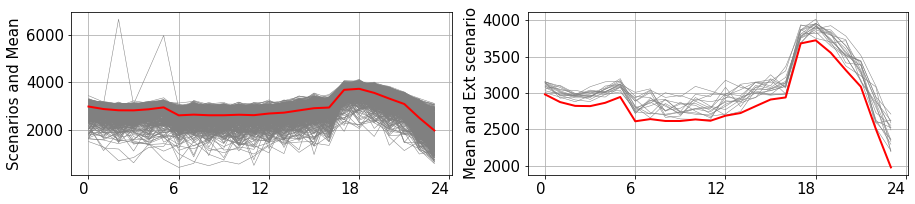

Daily production GWh for the mean, 68962.20681959999


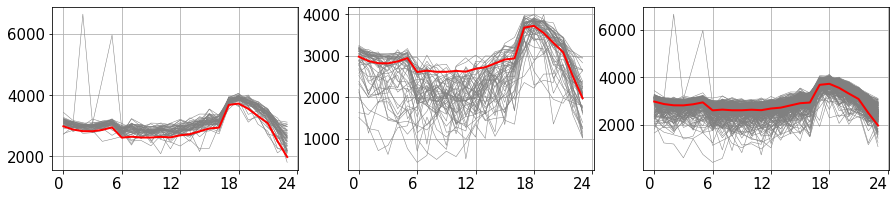

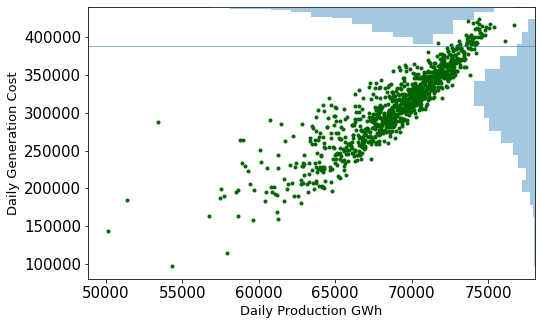

In [7]:
for i in range(0,4):
    date=input()
    Mean = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\Mean.csv")
    WindScenarios = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    PlotingRelationship1(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, date)

Jan
The indices of the scenarios which are always above the mean of the scenarios [564]


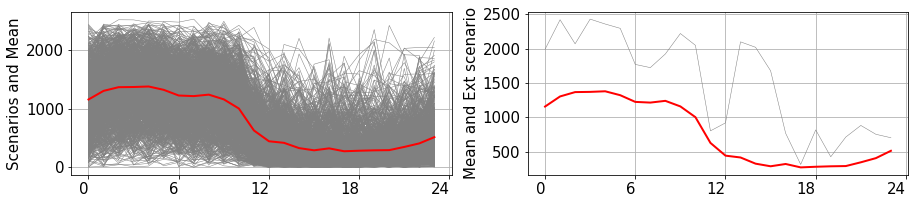

Daily production GWh for the mean, 18611.103845999998
Apr
The indices of the scenarios which are always above the mean of the scenarios [389, 794]


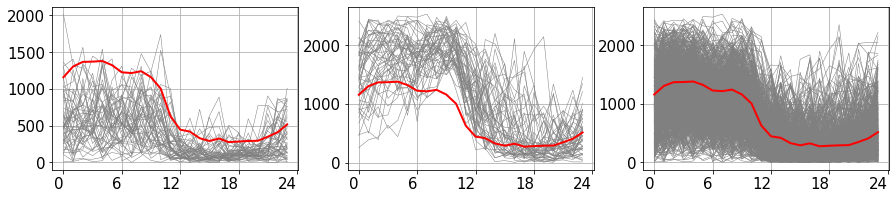

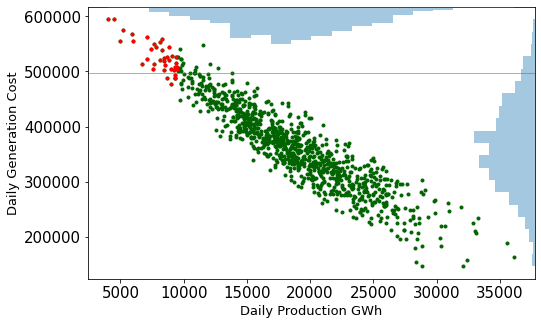

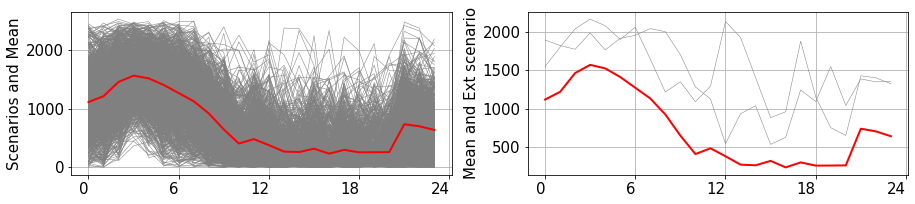

Daily production GWh for the mean, 17786.862796200003
June
The indices of the scenarios which are always above the mean of the scenarios []


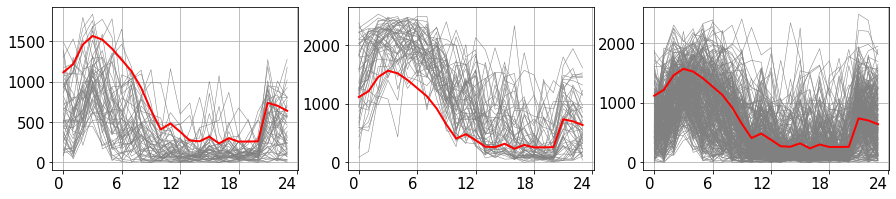

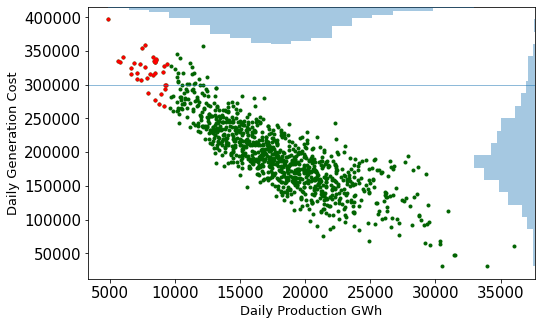

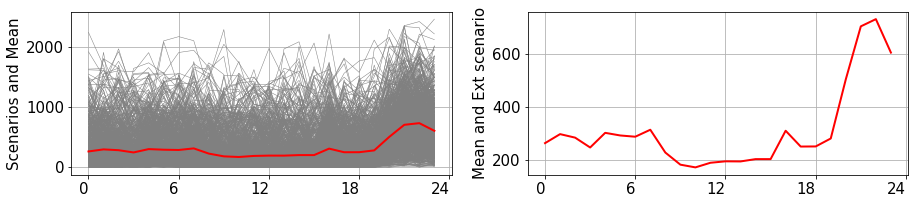

Daily production GWh for the mean, 7519.671978700001
Oct
The indices of the scenarios which are always above the mean of the scenarios [166]


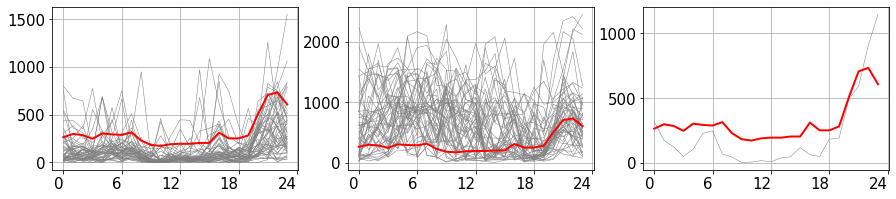

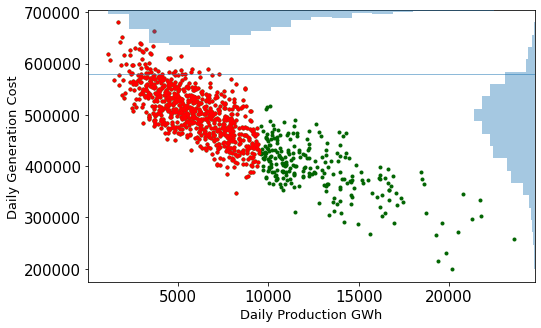

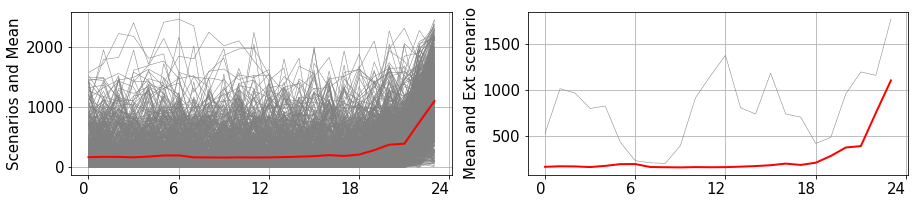

Daily production GWh for the mean, 6326.272027400004


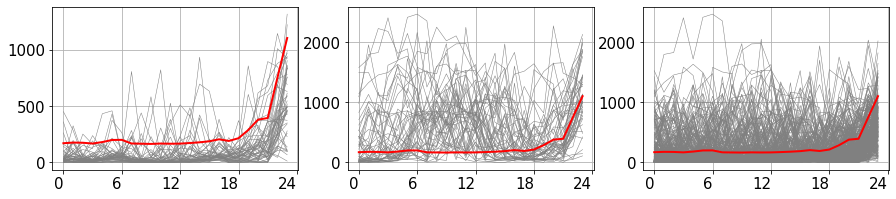

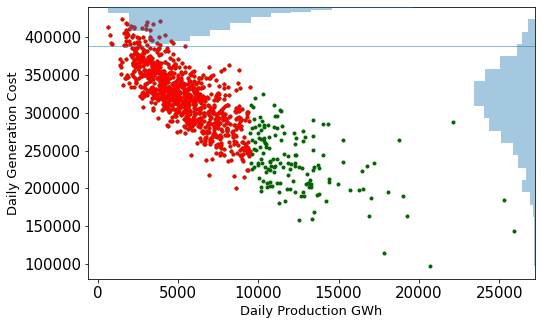

In [8]:
for i in range(0,4):
    date=input()
    Mean = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\Mean.csv")
    WindScenarios = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    PlotingRelationship2(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean,date)

Jan
The indices of the scenarios which are always above the mean of the scenarios []


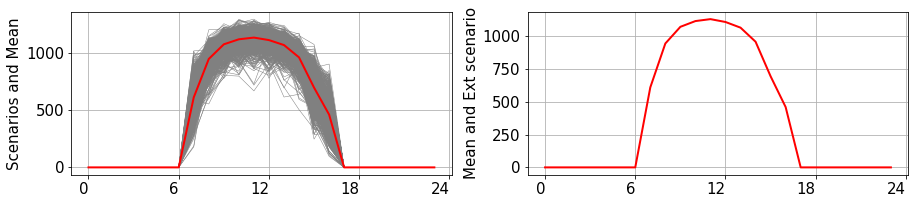

Daily production GWh for the mean, 9162.710387499998
Apr
The indices of the scenarios which are always above the mean of the scenarios []


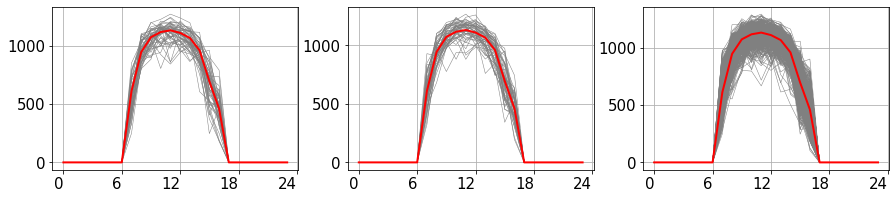

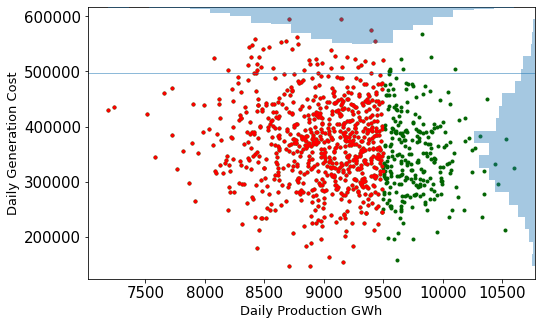

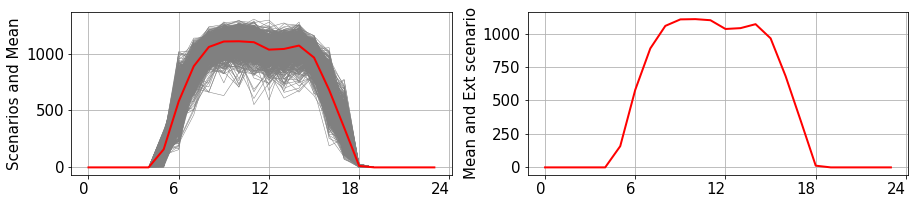

Daily production GWh for the mean, 11146.647932400005
June
The indices of the scenarios which are always above the mean of the scenarios []


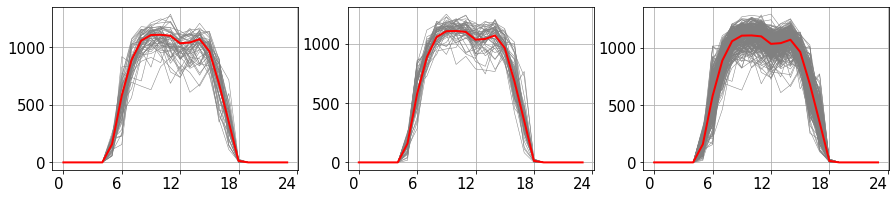

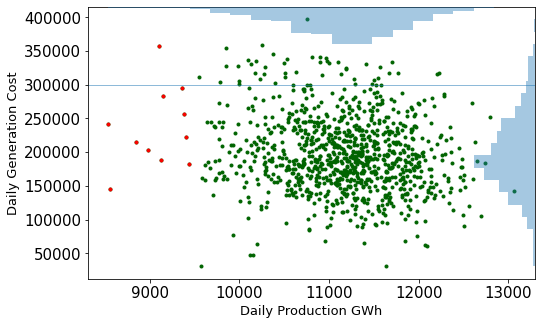

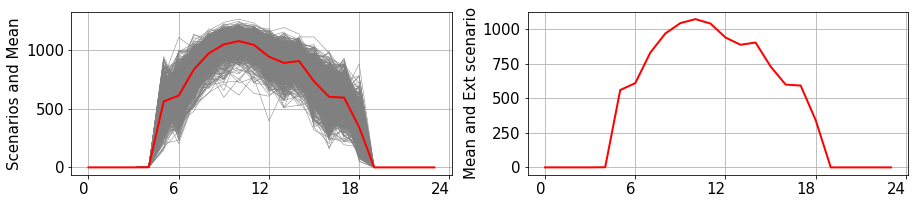

Daily production GWh for the mean, 11120.572958400002
Oct
The indices of the scenarios which are always above the mean of the scenarios []


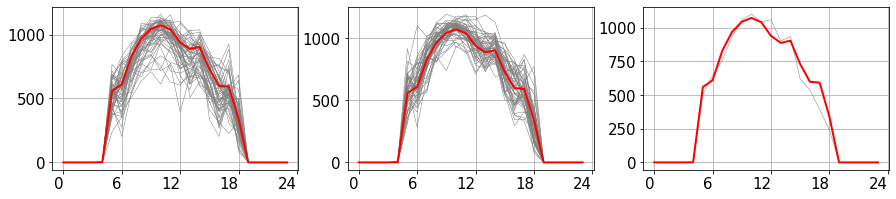

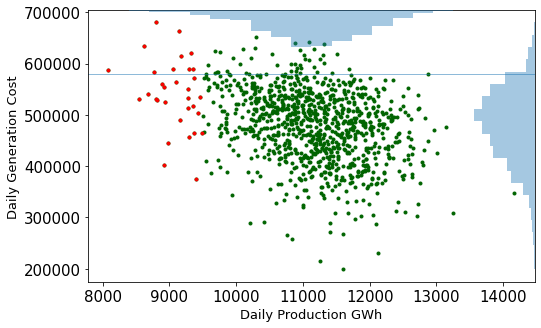

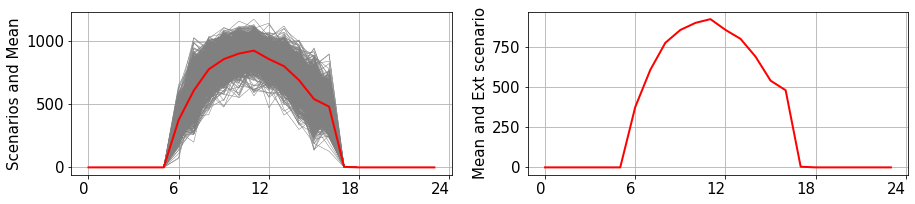

Daily production GWh for the mean, 7827.799059199999


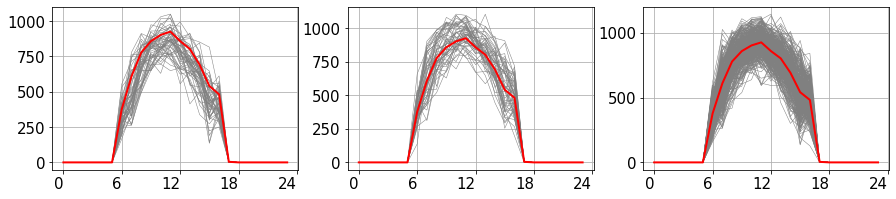

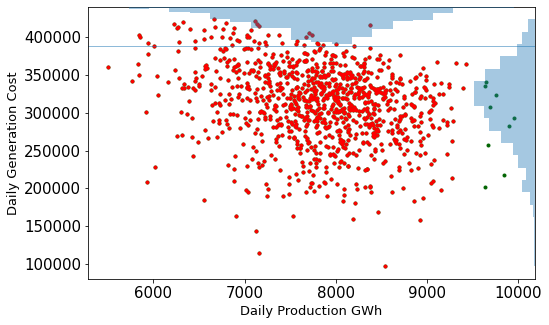

In [9]:
for i in range(0,4):
    date=input()
    Mean = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\Mean.csv")
    WindScenarios = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    PlotingRelationship3(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean,date)


Jan
Apr
June
Oct


<Figure size 1080x288 with 0 Axes>

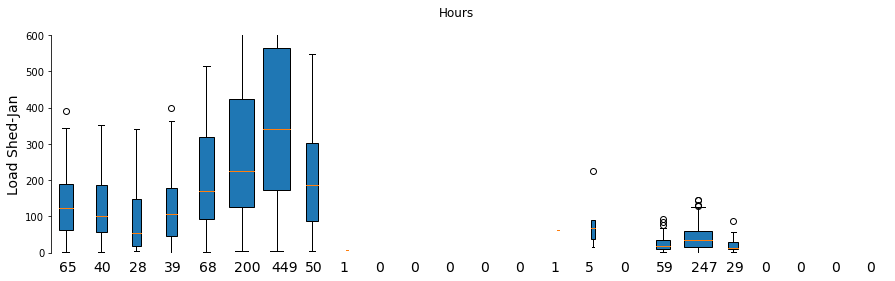

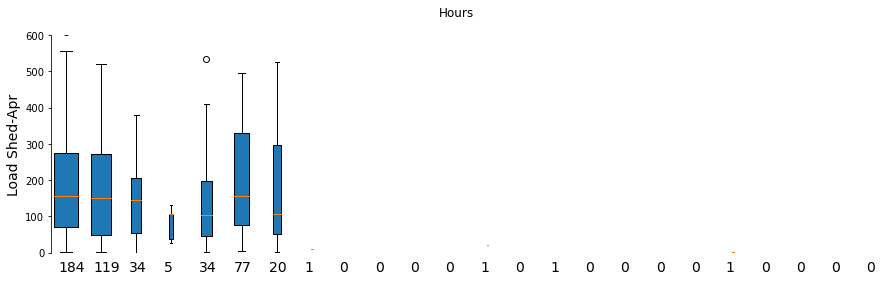

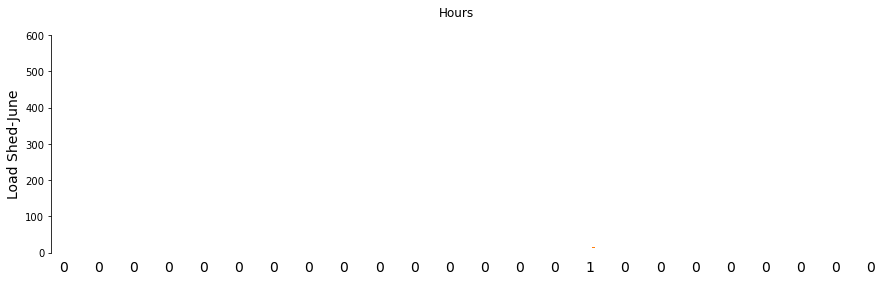

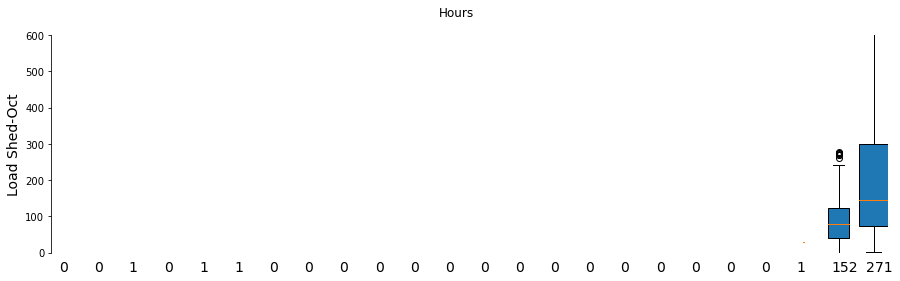

In [10]:
fig = plt.figure(figsize=(15,4))
for i in range(0,4):
    date=input()
    LoadShedHour = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData"+date+"\\LoadShedHour.csv")
    hours=LoadShedHour['hours']
    LoadShed=LoadShedHour['LoadShed']
    #ax = fig.add_subplot(1,4,i+1)
    #DurationLoadShed=[]
    #for i in range(0,1000):
    #    a=LoadShed[i]
    #    d=np.count_nonzero(a) 
    #    DurationLoadShed.append(d)
    #ax.set_ylabel("Frequency",fontsize=15)
    #ax.set_xlabel("Duration of Load Shed",fontsize=15)
    #ax.hist(DurationLoadShed, bins=10,color = "b")
    #plt.show
    #plt.grid()
    #ax.tick_params(labelsize=15)
    
    fig, axes = plt.subplots(nrows=1,ncols=24,figsize=(15,4))
    for i in range(0,24):
         ndx = (hours == i)
         curShed = LoadShed[ ndx]
         curShed = curShed[ curShed > 0]
         axes[i].boxplot(curShed,widths=np.sqrt(len(curShed))*0.06,patch_artist=True)
         axes[i].set_ylim(0,600)
         axes[i].axis('off')
         axes[i].text(0.75,-50,len(curShed), fontsize=14)
    axes[0].set_axis_on()
    axes[0].spines['top'].set_visible(False)
    axes[0].spines['bottom'].set_visible(False)
    axes[0].spines['right'].set_visible(False)
    axes[0].set_xticks([])
    plt.suptitle('Hours')
    axes[0].set_ylabel('Load Shed-'+date,fontsize=14)